In [1]:
import time
import random
import mlx.core as mx
import mlx.nn as nn
import mlx.optimizers as optim
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

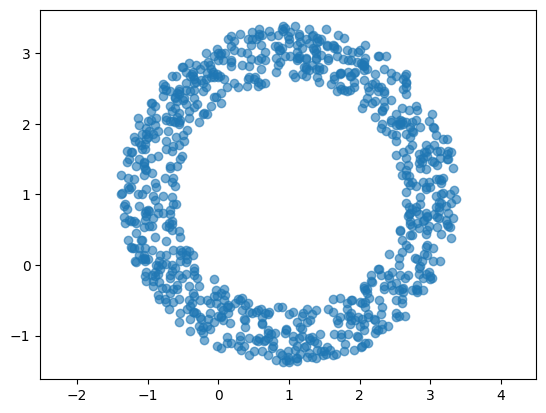

In [2]:
def make_data(center, radius, size, width):

    low_x = center[0] - radius - width
    high_x = center[0] + radius + width
    low_y = center[1] - radius - width
    high_y = center[1] + radius + width
    
    a = mx.arange(low_x,high_x,0.02)
    b = mx.arange(low_y,high_y,0.02)
    
    aa, bb = np.meshgrid(a, b, indexing='ij')

    # Stack and reshape to Cartesian product
    cartesian = np.stack([aa.ravel(), bb.ravel()], axis=1)

    s = random.sample(list(cartesian), size)

    xys = [x for x in s if (((x[0] - center[0]) ** 2 + (x[1] - center[1]) ** 2 >= (radius - width) ** 2) and
                             (x[0] - center[0]) ** 2 + (x[1] - center[1]) ** 2 <= (radius + width) ** 2)]

    return xys

xys = make_data((1,1), 2, 2_000, 0.4)
x = [a[0] for a in xys]
y = [a[1] for a in xys]

plt.scatter(x, y, alpha=0.6)
plt.axis("equal");

In [3]:
(-1) ** np.random.choice(2, 10)

array([ 1, -1, -1, -1,  1, -1,  1, -1, -1, -1])

In [4]:
a=np.random.uniform(-1,1,10)
a, a/10

(array([-0.49199614, -0.93526128, -0.28070693,  0.67231985, -0.62070259,
         0.61144397,  0.28174389,  0.59335699,  0.88042898, -0.22626314]),
 array([-0.04919961, -0.09352613, -0.02807069,  0.06723199, -0.06207026,
         0.0611444 ,  0.02817439,  0.0593357 ,  0.0880429 , -0.02262631]))

In [5]:
import numpy as np
import time

size = 1_000_000

start = time.time()
a = (-1) ** np.random.choice(2, size)
print("Power method:", time.time() - start)

start = time.time()
b = np.random.choice([-1, 1], size)
print("Direct method:", time.time() - start)


Power method: 0.02873086929321289
Direct method: 0.0053060054779052734


In [6]:
(-1) ** np.random.choice(2, 10)

array([-1,  1, -1,  1,  1, -1, -1,  1,  1,  1])

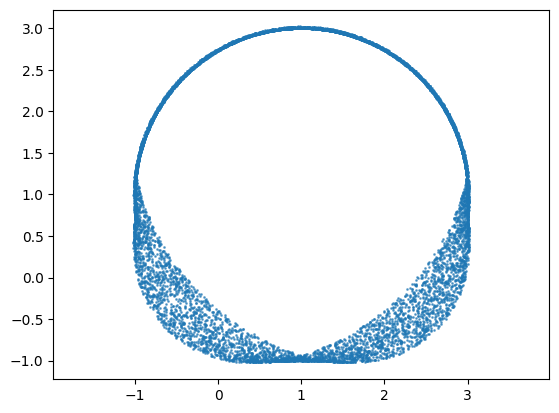

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(center, radius, size, width):
    angles = np.random.uniform(0, np.pi, size)  # Half-circle
    signs = np.random.choice([-1, 1], size)     # Flip to cover both U and ∩
    
    # Base circle points
    x = center[0] + radius * np.cos(angles)
    y = center[1] + signs * radius * np.sin(angles)

    # Add perpendicular noise
    wiggle = np.random.uniform(-width, width, size)
    dx = -np.sin(angles)  # unit vector perpendicular to the circle
    dy = np.cos(angles)

    x += wiggle * dx
    y += wiggle * dy

    return x, y

# Example usage
x, y = make_data(center=(1, 1), radius=2, size=10_000, width=0.3)
plt.scatter(x, y, alpha=0.6, s=1)
plt.axis("equal")
plt.show()


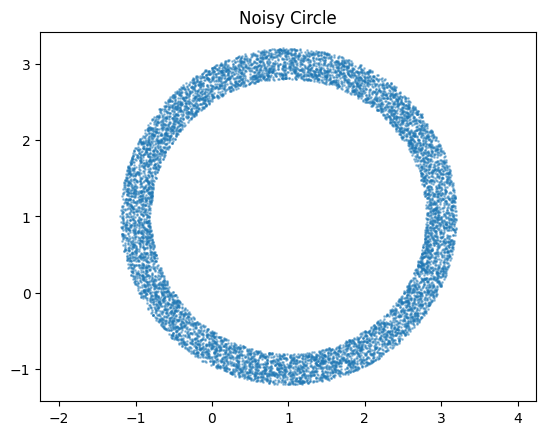

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(center, radius, size, width):
    # Uniform angle around the circle
    theta = np.random.uniform(0, 2 * np.pi, size)

    # Add radial noise (the "wiggle")
    r = radius + np.random.uniform(-width, width, size)

    # Convert polar to cartesian
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)

    return x, y

# Example usage
x, y = make_data(center=(1, 1), radius=2, size=10_000, width=0.2)

plt.scatter(x, y, alpha=0.4, s=1)
plt.axis("equal")
plt.title("Noisy Circle")
plt.show()


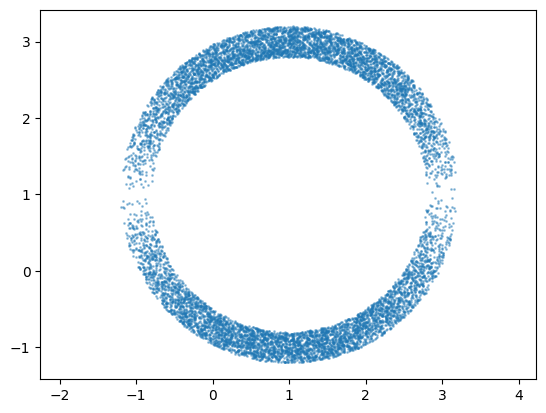

In [9]:
def make_data(center, radius, size, width):
    wiggle = np.random.uniform(-width, width, size)
    x = np.random.uniform(center[0] - radius, center[0] + radius, size)
    y = center[1] + (-1) ** np.random.choice(2, size) * np.sqrt((radius) ** 2 - (x - center[0]) ** 2)
    x = x + wiggle * (x - center[0]) / radius
    y = y + wiggle * (y - center[1])/ radius
    return x, y

x, y = make_data((1,1), 2, 10_000, .2)
plt.scatter(x, y, alpha=0.4, s=1)
plt.axis("equal");

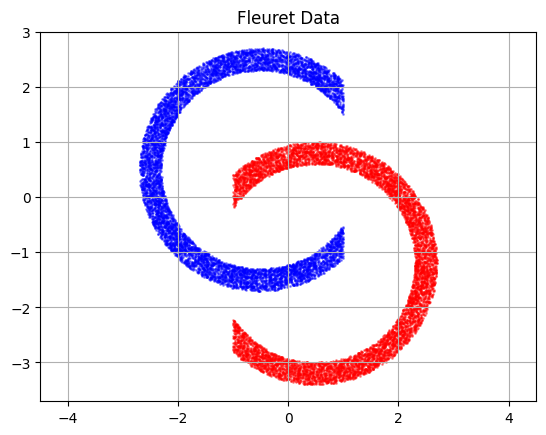

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(center, radius, size, width):
    # Uniform angle around the circle
    theta = np.random.uniform(0, 2 * np.pi, size)

    # Add radial noise (the "wiggle")
    r = radius + np.random.uniform(-width, width, size)

    # Convert polar to cartesian
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)

    return x, y

# Example usage
x_left, y_left = make_data(center=(-.5, .5), radius=2, size=10_000, width=0.2)
x_right, y_right = make_data(center=(.5, -1.2), radius=2, size=10_000, width=0.2)

x_blue = x_left[x_left < 1]
y_blue = y_left[x_left < 1]
x_red = x_right[x_right > -1]
y_red = y_right[x_right > -1]

s = min(x_blue.shape, x_red.shape)[0]
x_blue = x_blue[:s]
y_blue = y_blue[:s]
x_red = x_red[:s]
y_red = y_red[:s]

plt.scatter(x_blue, y_blue, alpha=0.4, s=1, color='blue')
plt.scatter(x_red, y_red, alpha=0.4, s=1, color='red')
plt.axis("equal")
plt.title("Fleuret Data")
plt.grid()
plt.show()


In [11]:
# Configuration
training_size = 1_500


In [12]:
x_blue.shape, x_red.shape, y_blue.shape, y_red.shape

((7762,), (7762,), (7762,), (7762,))

In [13]:
xs = mx.concat([mx.array(x_blue), mx.array(x_red)]).reshape(-1,1)
ys = mx.concat([mx.array(y_blue), mx.array(y_red)]).reshape(-1,1)

Xs = mx.concat([xs, ys], axis=1)
target = mx.concat([mx.ones(len(x_red)), mx.zeros(len(x_red))])

Xs.shape, target.shape

((15524, 2), (15524,))

In [14]:
mean = Xs.mean(axis=0)       # shape (2,)
std = Xs.std(axis=0)         # shape (2,)
X_norm = (Xs - mean) / std

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X_norm), list(target))
# X_train, X_test, y_train, y_test = train_test_split(np.array(Xs), list(target))
y_train = mx.array(y_train)
y_test = mx.array(y_test)

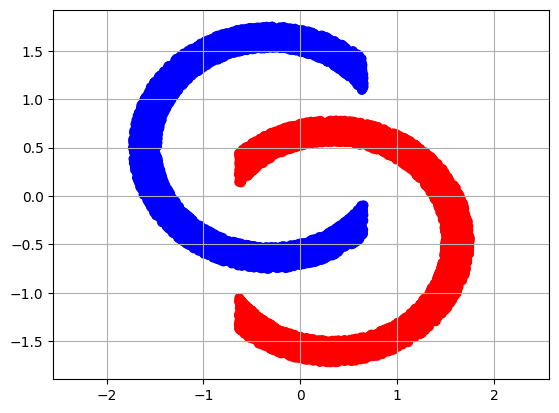

In [16]:
colors = ['red' if y.item() == 0 else 'blue' for y in y_train]
plt.scatter(X_train[:,0], X_train[:,1], color=colors);
plt.axis("equal");
plt.grid();


In [17]:
X_train.shape, X_test.shape

((11643, 2), (3881, 2))

In [27]:
learning_rate = .3
batch_size = 256
epochs = 100

depth = 8

# layers = []
# for x in range(8):
#     layers.append(nn.Linear(2, 2))
#     # layers.append(nn.Tanh())
#     layers.append(nn.ReLU())
# layers.append(nn.Linear(2, 1))


layers = []
for x in range(depth):
    layers.append(nn.Linear(2, 2))
    layers.append(nn.Tanh())
    # layers.append(nn.ReLU())
layers.append(nn.Linear(2, 1))


class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            *layers
        )

    def __call__(self, x):
        return self.net(x)

def print_grad_norms(grads, prefix=""):
    if isinstance(grads, dict):
        for k, v in grads.items():
            if k == 'bias':
                pass
            else:
                print_grad_norms(v, prefix=f"{prefix}.{k}" if prefix else k)
    elif isinstance(grads, list):
        for i, v in enumerate(grads):
            print_grad_norms(v, prefix=f"{prefix}[{i}]")
    elif isinstance(grads, mx.array):
        norm = mx.linalg.norm(grads).item()
        print(f"grad norm {prefix}: {norm:.6e}")

# 2. Generate training data
np.random.seed(42)

# 3. Initialize model and optimizer
model = MyModel()

def loss_fn(model, X, y):
    return nn.losses.binary_cross_entropy(model(X).reshape(-1), y, reduction="mean")

optimizer = optim.SGD(learning_rate=learning_rate)
loss_and_grad_fn = nn.value_and_grad(model, loss_fn)

@partial(mx.compile, inputs=model.state, outputs=model.state)
def step(X, y):
    # print(X.shape, y.shape)
    loss, grads = loss_and_grad_fn(model, X, y)
    optimizer.update(model, grads)
    return loss, grads

@partial(mx.compile, inputs=model.state)
def eval_fn(X, y):
    probs = mx.sigmoid(model(X))
    preds = (probs > 0.5).astype(mx.float32)
    return mx.mean(preds.reshape(-1) == y)

def batch_iterate(batch_size, X, y):
    perm = mx.array(np.random.permutation(y.size))
    for s in range(0, y.size, batch_size):
        ids = perm[s : s + batch_size]
        # print(y[ids].mean().item())
        yield X[ids], y[ids]

i = 0

# 4. Training loop
tic = time.perf_counter()

for e in range(epochs):
    for X, y in batch_iterate(batch_size, X_train, y_train):
        _, grads = step(mx.array(X), y)
        mx.eval(model.state)
        # print_grad_norms(grads)
    accuracy = eval_fn(mx.array(X_test), y_test)
    loss = loss_fn(model, mx.array(X_test), y_test)
    toc = time.perf_counter()
    print(
        f"Epoch {e}: Test accuracy {accuracy.item():.3f}, Loss: {loss:.3f},"
        f" Time {toc - tic:.3f} (s)"
    )

    # print(" ## NORM ## ")
    # m=None
    # M=None
    # for l in model.net.layers:
    #     if isinstance(l, nn.layers.Linear):
    #         print(mx.linalg.norm(l.parameters()['weight']).item())
            

Epoch 0: Test accuracy 0.492, Loss: 0.693, Time 0.072 (s)
Epoch 1: Test accuracy 0.492, Loss: 0.693, Time 0.129 (s)
Epoch 2: Test accuracy 0.492, Loss: 0.693, Time 0.184 (s)
Epoch 3: Test accuracy 0.508, Loss: 0.691, Time 0.238 (s)
Epoch 4: Test accuracy 0.679, Loss: 0.685, Time 0.291 (s)
Epoch 5: Test accuracy 0.803, Loss: 0.493, Time 0.344 (s)
Epoch 6: Test accuracy 0.801, Loss: 0.448, Time 0.397 (s)
Epoch 7: Test accuracy 0.814, Loss: 0.428, Time 0.449 (s)
Epoch 8: Test accuracy 0.791, Loss: 0.487, Time 0.501 (s)
Epoch 9: Test accuracy 0.786, Loss: 0.508, Time 0.558 (s)
Epoch 10: Test accuracy 0.800, Loss: 0.475, Time 0.610 (s)
Epoch 11: Test accuracy 0.868, Loss: 0.340, Time 0.663 (s)
Epoch 12: Test accuracy 0.638, Loss: 0.792, Time 0.716 (s)
Epoch 13: Test accuracy 0.869, Loss: 0.336, Time 0.771 (s)
Epoch 14: Test accuracy 0.936, Loss: 0.236, Time 0.824 (s)
Epoch 15: Test accuracy 0.876, Loss: 0.317, Time 0.879 (s)
Epoch 16: Test accuracy 0.883, Loss: 0.311, Time 0.933 (s)
Epoch 1

In [43]:
v = mx.array([[1,1],[1,1]])
v

array([[1, 1],
       [1, 1]], dtype=int32)

In [29]:
class MySubModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(*model.net.layers[:-1])

    def __call__(self, x):
        return self.net(x)



In [44]:
model(v)

array([[-7.72521],
       [-7.72521]], dtype=float32)

In [45]:
sub_model = MySubModel()
sub_model(v)

array([[0.958158, -0.992458],
       [0.958158, -0.992458]], dtype=float32)

In [32]:
for l in model.net.layers:
    if isinstance(l, nn.layers.Linear):
        print(mx.linalg.norm(l.parameters()['weight']).item())

5.358816146850586
5.2952752113342285
2.361757516860962
1.657153606414795
1.6354362964630127
1.937808871269226
2.2152504920959473
2.6422338485717773
5.664336681365967


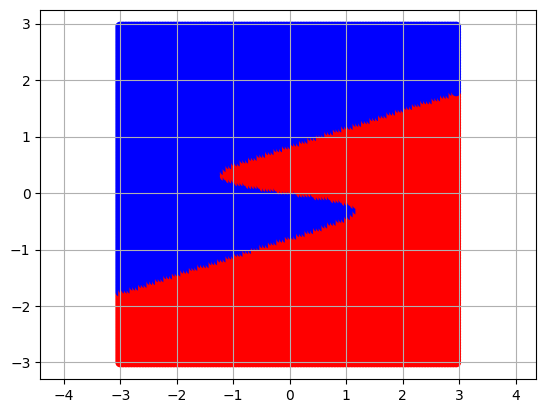

In [34]:
a = mx.arange(-3,3,0.05)
b = mx.arange(-3,3,0.05)
a.shape, b.shape

aa, bb = np.meshgrid(a, b, indexing='ij')

# Stack and reshape to Cartesian product
cartesian = np.stack([aa.ravel(), bb.ravel()], axis=1)

len(cartesian)

colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(cartesian))) > 0.5)).astype(int)]
plt.scatter(cartesian[:,0], cartesian[:,1], color=colors);

plt.axis("equal");
plt.grid();

In [54]:
img = sub_model(mx.array(cartesian))
img

colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(cartesian))) > 0.5)).astype(int)]

In [65]:
model.net.layers[-1].weight, model.net.layers[-1].bias

(array([[-2.88235, 4.87614]], dtype=float32), array([-0.1241], dtype=float32))

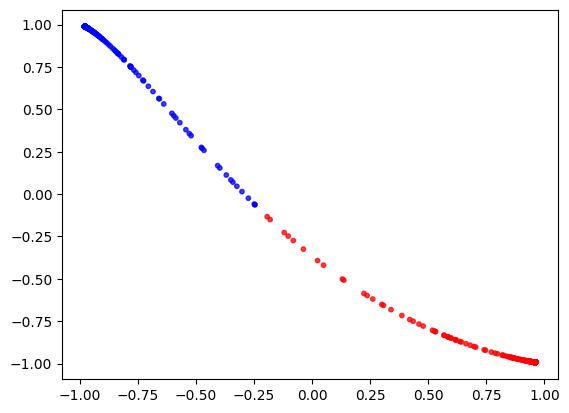

In [60]:
x=img[:,0]
y=img[:,1]
plt.scatter(x, y, alpha=0.75, s=10, color=colors)

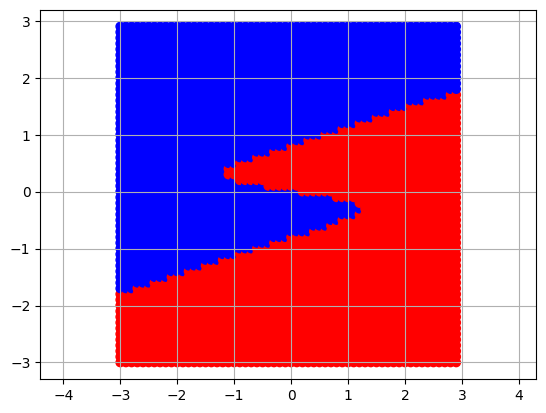

In [38]:
a = mx.arange(-3,3,0.1)
b = mx.arange(-3,3,0.1)
a.shape, b.shape

aa, bb = np.meshgrid(a, b, indexing='ij')

# Stack and reshape to Cartesian product
cartesian = np.stack([aa.ravel(), bb.ravel()], axis=1)

len(cartesian)

colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(cartesian))) > 0.5)).astype(int)]
plt.scatter(cartesian[:,0], cartesian[:,1], color=colors);

plt.axis("equal");
plt.grid();

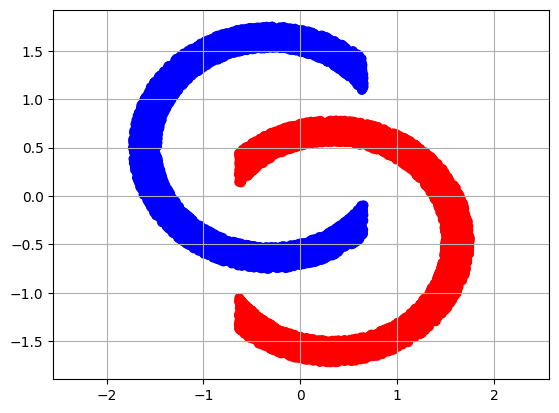

In [35]:
colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(X_train))) > 0.5)).astype(int)]
plt.scatter(X_train[:,0], X_train[:,1], color=colors);
plt.axis("equal");
plt.grid();

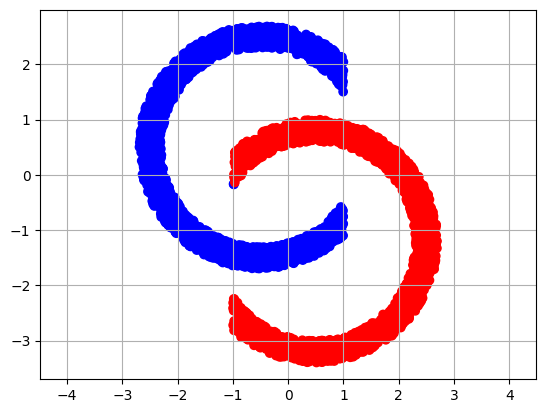

In [36]:
X_T = (X_test * std) + mean
colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(X_test))) > 0.5)).astype(int)]
plt.scatter(X_T[:,0], X_T[:,1], color=colors);
plt.axis("equal");
plt.grid();

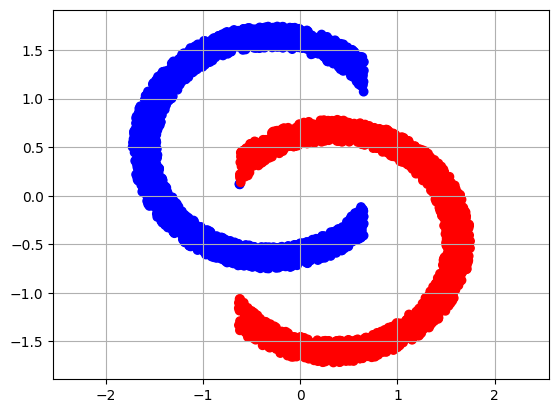

In [37]:
colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(X_test))) > 0.5)).astype(int)]
plt.scatter(X_test[:,0], X_test[:,1], color=colors);
plt.axis("equal");
plt.grid();